In [109]:
from pmdarima import auto_arima

In [111]:
import pandas as pd
from datetime import timedelta

In [113]:
# Load the expense data
expense_data = pd.read_csv('expenseData.csv')

In [115]:
# Convert date column to datetime format
expense_data['date'] = pd.to_datetime(expense_data['date'])

In [117]:
# Aggregate expenses by day to get daily totall expenses
daily_expenses = expense_data.groupby('date')['amount'].sum().reset_index()

In [119]:
# Prepare data for ARIMA by setting the date as the index
daily_expenses.set_index('date',
                         inplace = True)

In [121]:
# Fit an ARIMA model using auto_arima to determine the best p, d, q parameters
model = auto_arima(daily_expenses['amount'], seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=769.844, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=749.314, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=767.867, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=743.573, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=730.413, Time=0.18 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=729.137, Time=0.33 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=731.122, Time=0.28 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=727.147, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=728.413, Time=0.15 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=729.130, Time=0.18 sec
 A

In [123]:
# Forecast the next 30 days
n_periods = 30
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

In [125]:
# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(daily_expenses.index[-1] + timedelta(days=1), periods=n_periods, freq='D')
forecast_df = pd.DataFrame({'date': forecast_dates, 'predicted_expense': forecast})

In [127]:
# Show the forecasted values
print(forecast_df)

                 date  predicted_expense
2024-10-29 2024-10-29         147.693445
2024-10-30 2024-10-30         176.008600
2024-10-31 2024-10-31         176.008600
2024-11-01 2024-11-01         176.008600
2024-11-02 2024-11-02         176.008600
2024-11-03 2024-11-03         176.008600
2024-11-04 2024-11-04         176.008600
2024-11-05 2024-11-05         176.008600
2024-11-06 2024-11-06         176.008600
2024-11-07 2024-11-07         176.008600
2024-11-08 2024-11-08         176.008600
2024-11-09 2024-11-09         176.008600
2024-11-10 2024-11-10         176.008600
2024-11-11 2024-11-11         176.008600
2024-11-12 2024-11-12         176.008600
2024-11-13 2024-11-13         176.008600
2024-11-14 2024-11-14         176.008600
2024-11-15 2024-11-15         176.008600
2024-11-16 2024-11-16         176.008600
2024-11-17 2024-11-17         176.008600
2024-11-18 2024-11-18         176.008600
2024-11-19 2024-11-19         176.008600
2024-11-20 2024-11-20         176.008600
2024-11-21 2024-

In [129]:
# the forecast for all future dates is the same (e.g., 176.008600), 
#it typically indicates that the model has not 
#detected any significant trends or seasonal patterns in the data

In [131]:
import matplotlib.pyplot as plt

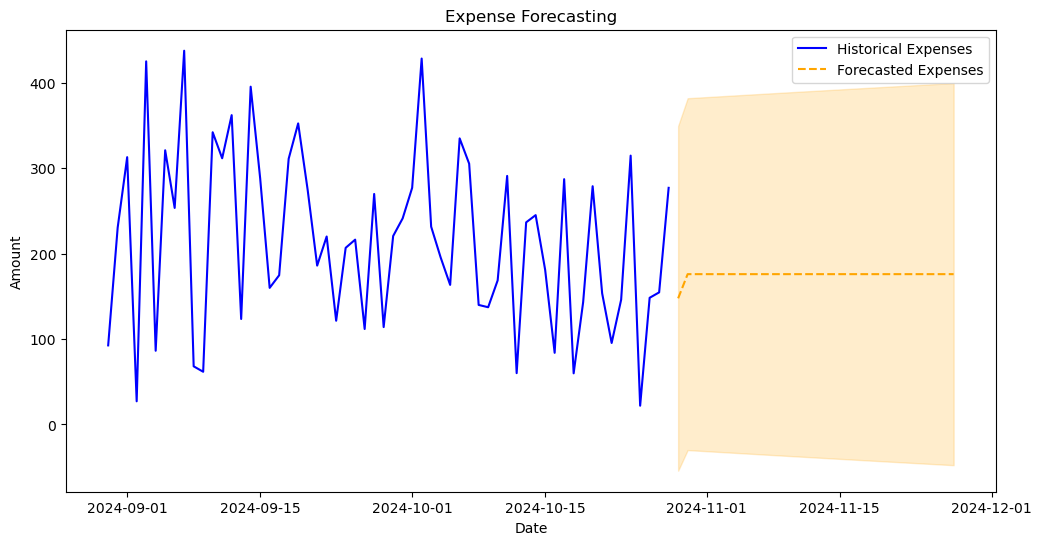

In [133]:


# Plot historical expenses
plt.figure(figsize=(12, 6))
plt.plot(daily_expenses.index, daily_expenses['amount'], label='Historical Expenses', color='blue')

# Plot forecasted expenses
plt.plot(forecast_dates, forecast, label='Forecasted Expenses', color='orange', linestyle='--')

# Adding confidence intervals
plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2)

# Labeling the plot
plt.title('Expense Forecasting')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()


In [135]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -358.313
Date:                Tue, 29 Oct 2024   AIC                            722.625
Time:                        12:37:32   BIC                            728.858
Sample:                    08-30-2024   HQIC                           725.058
                         - 10-28-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2035      0.160     -7.503      0.000      -1.518      -0.889
ma.L2          0.2851      0.144      1.981      0.048       0.003       0.567
sigma2      1.061e+04   2656.397      3.993      0.0

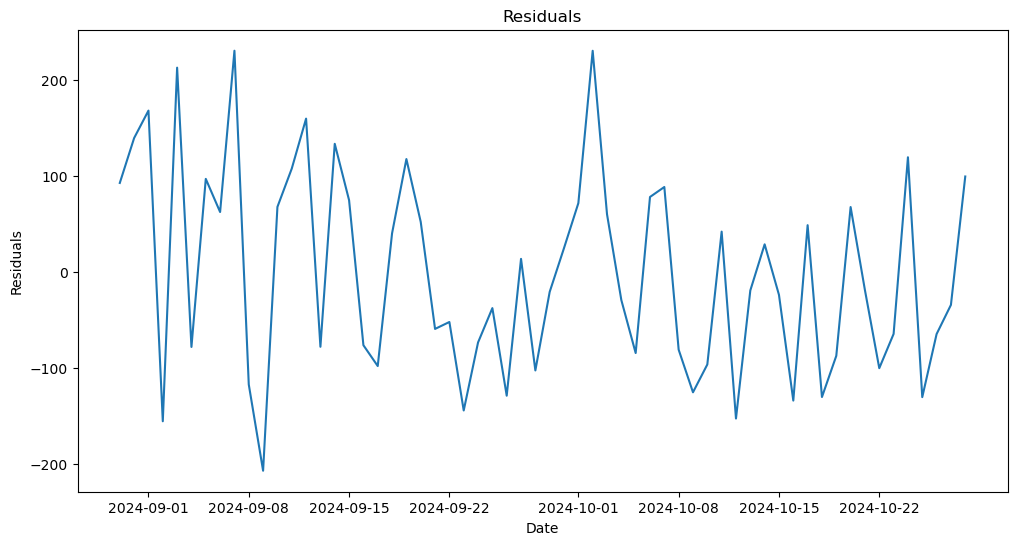

In [137]:
# Examine Residuals
residuals = daily_expenses['amount'] - model.predict_in_sample()
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()


In [139]:
from statsmodels.tsa.arima.model import ARIMA 


In [141]:
# Fit an ARIMA model with specified parameters
model = ARIMA(daily_expenses['amount'], order=(2, 1, 2))  # Adjust parameters as needed
model_fit = model.fit()

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [143]:
# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   60
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -357.593
Date:                Tue, 29 Oct 2024   AIC                            725.186
Time:                        12:37:44   BIC                            735.574
Sample:                    08-30-2024   HQIC                           729.241
                         - 10-28-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2010      0.127     -9.480      0.000      -1.449      -0.953
ar.L2         -0.3058      0.136     -2.250      0.024      -0.572      -0.039
ma.L1          0.0916      1.241      0.074      0.9

In [145]:
# Make predictions
forecast = model_fit.forecast(steps=30)

In [147]:
# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(daily_expenses.index[-1] + timedelta(days=1), periods=30, freq='D')
forecast_df = pd.DataFrame({'date': forecast_dates, 'predicted_expense': forecast})


In [149]:

# Show forecasted values
print(forecast_df)

                 date  predicted_expense
2024-10-29 2024-10-29         155.252594
2024-10-30 2024-10-30         182.368388
2024-10-31 2024-10-31         187.057095
2024-11-01 2024-11-01         173.133893
2024-11-02 2024-11-02         188.421933
2024-11-03 2024-11-03         174.318633
2024-11-04 2024-11-04         186.581684
2024-11-05 2024-11-05         176.166488
2024-11-06 2024-11-06         184.925149
2024-11-07 2024-11-07         177.590921
2024-11-08 2024-11-08         183.720967
2024-11-09 2024-11-09         178.601558
2024-11-10 2024-11-10         182.875425
2024-11-11 2024-11-11         179.308005
2024-11-12 2024-11-12         182.285545
2024-11-13 2024-11-13         179.800422
2024-11-14 2024-11-14         181.874536
2024-11-15 2024-11-15         180.143465
2024-11-16 2024-11-16         181.588225
2024-11-17 2024-11-17         180.382423
2024-11-18 2024-11-18         181.388790
2024-11-19 2024-11-19         180.548873
2024-11-20 2024-11-20         181.249870
2024-11-21 2024-

In [151]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [153]:
# Assuming you split the data into train and test sets
train_size = int(len(daily_expenses) * 0.8)
train, test = daily_expenses[:train_size], daily_expenses[train_size:]


In [155]:
# Fit the model on the training set
model = ARIMA(train['amount'], order=(2, 1, 2))  # Use your chosen parameters
model_fit = model.fit()

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [157]:
# Predict on the test set
predictions = model_fit.forecast(steps=len(test))
mae = mean_absolute_error(test['amount'], predictions)
rmse = mean_squared_error(test['amount'], predictions, squared=False)

C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [159]:

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 85.97279824602593
Root Mean Squared Error: 103.07247741993687


In [161]:
import joblib

In [165]:
joblib.dump(model_fit, 'expensePrediction.pkl')

['expensePrediction.pkl']